In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BlinkIT-Grocery-Data (1).csv')

In [18]:
print(df.head())

   ItemFat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Siz0e        Outlet Type  Item Visibility  Item Weight     Sales  \
0       Medium  Supermarket Type1         0.100014        15.10  145.4786   
1       Medium  Supermarket Type2         0.008596  

In [19]:
df.columns.tolist()

[' ItemFat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Establishment Year',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Siz0e',
 'Outlet Type',
 'Item Visibility',
 'Item Weight',
 'Sales',
 'Rating']

In [20]:
print(df.describe())

       Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  7060.000000  8523.000000   
mean                 2016.450546         0.066132    12.857645   140.992783   
std                     3.189396         0.051598     4.643456    62.275067   
min                  2011.000000         0.000000     4.555000    31.290000   
25%                  2014.000000         0.026989     8.773750    93.826500   
50%                  2016.000000         0.053931    12.600000   143.012800   
75%                  2018.000000         0.094585    16.850000   185.643700   
max                  2022.000000         0.328391    21.350000   266.888400   

            Rating  
count  8523.000000  
mean      3.965857  
std       0.605651  
min       1.000000  
25%       4.000000  
50%       4.000000  
75%       4.200000  
max       5.000000  


In [21]:
popular_products = df['Item Identifier'].value_counts().head(10)
print(popular_products)

Item Identifier
FDW13    10
FDG33    10
FDF56     9
FDF52     9
FDV38     9
NCJ30     9
NCF42     9
FDW49     9
FDO19     9
FDV60     9
Name: count, dtype: int64


In [22]:
popular_categories = df['Item Type'].value_counts().head(10)
print(popular_categories)

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64


In [23]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Plot popular products
#plt.figure(figsize=(10, 6))
#sns.barplot(x=Sales.values, y=Sales.index)
#plt.title('Top 10 Popular Products')
#plt.xlabel('Number of Orders')
#plt.ylabel('Sales')
#plt.show()



c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


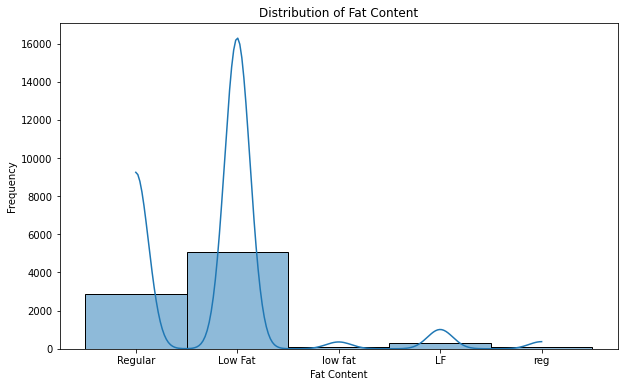

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of fat content
plt.figure(figsize=(10, 6))
sns.histplot(df[' ItemFat Content'], bins=30, kde=True)
plt.title('Distribution of Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Calculate total sales
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 1201681.4928


c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


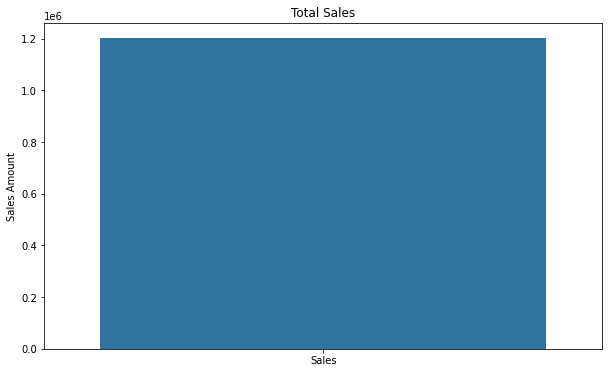

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=['Sales'], y=[total_sales])
plt.title('Total Sales')
plt.ylabel('Sales Amount')
plt.show()


In [27]:
# Check the first few rows of the dataset
print(df.head())

# Calculate the distribution of outlet sizes
outlet_size_distribution = df['Outlet Siz0e'].value_counts()
print(outlet_size_distribution)


   ItemFat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Siz0e        Outlet Type  Item Visibility  Item Weight     Sales  \
0       Medium  Supermarket Type1         0.100014        15.10  145.4786   
1       Medium  Supermarket Type2         0.008596  

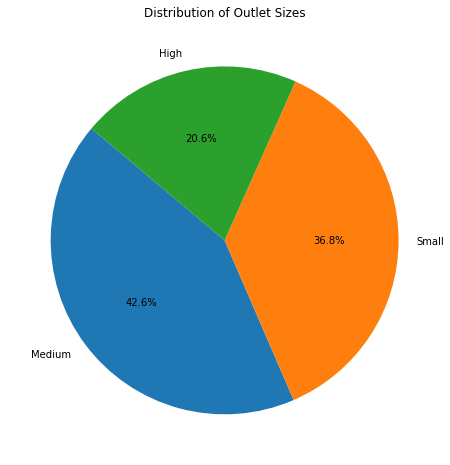

In [28]:
import matplotlib.pyplot as plt

# Plot pie chart for outlet sizes
plt.figure(figsize=(8, 8))
plt.pie(outlet_size_distribution, labels=outlet_size_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Outlet Sizes')
plt.show()


In [29]:
# Calculate the total number of items sold for each product
# items_sold = df.groupby('Item Identifier')[''].sum().reset_index()
# items_sold = items_sold.sort_values(by='quantity', ascending=False).head(10)
# print(items_sold)


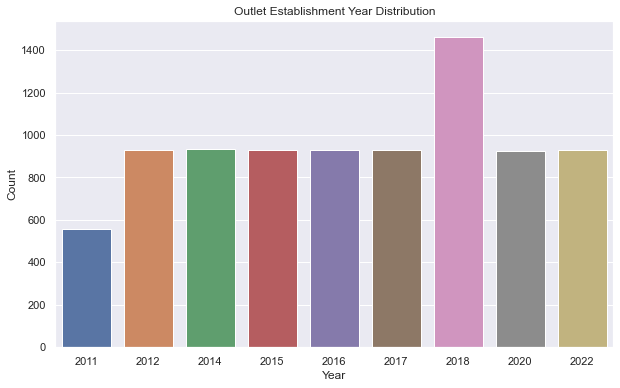

In [30]:

import seaborn as sns
# Set the theme for seaborn
sns.set_theme()

# Visualization of Outlet Establishment Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet Establishment Year')
sns.countplot(data=df, x='Outlet Establishment Year')
plt.title('Outlet Establishment Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


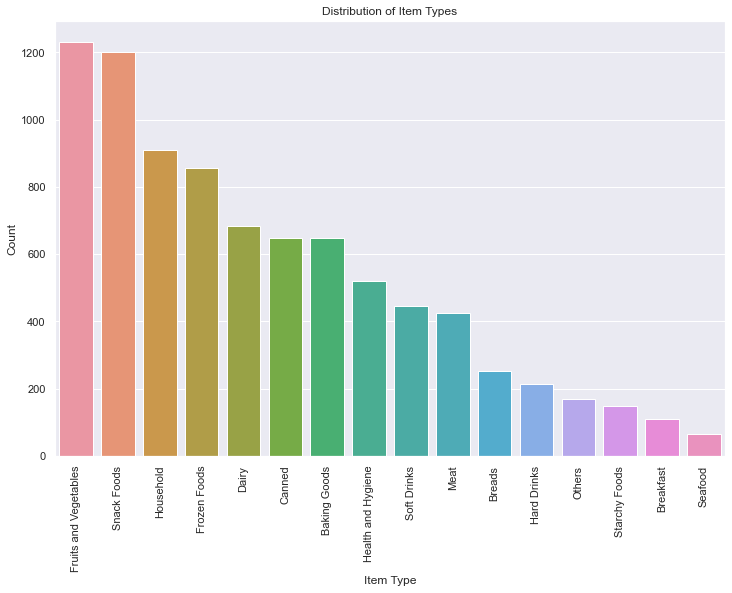

In [31]:
# Visualization of Item Types
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Item Type', order=df['Item Type'].value_counts().index)
plt.title('Distribution of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


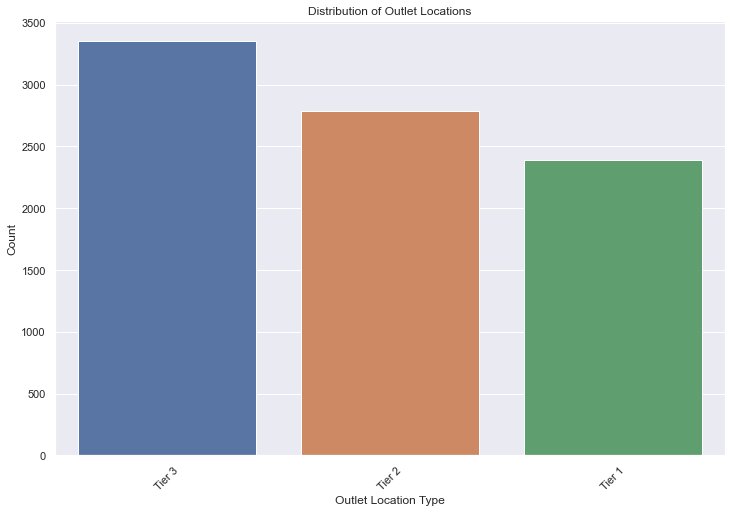

In [32]:
# Set the theme for seaborn
sns.set_theme()

# Visualization of Outlet Locations
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Outlet Location Type', order=df['Outlet Location Type'].value_counts().index)
plt.title('Distribution of Outlet Locations')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

